In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PyLRO import pylro
def structure_factor(pos, hkl):
    """ N*1 array"""
    F = 0
    h, k, l = hkl
    for xyz in pos:
        x,y,z = xyz
        F += np.exp(-2*np.pi*(1j)*(h*x + k*y+ l*z))

    return F
#Load a structure and fit the sublattice
###################################
#Put file info here#
file='../../S812/POSCAR.201' 
n=13
###################################


amor=pylro(file,n)
amor.lattice_fit()

pmax=13
#[1,0,0]
print('a:')
for i in range(1,pmax):
        print(i,'  ' ,np.abs(structure_factor(amor.atom_locations,np.array([1,0,0])*i)))
        
#[0,1,0]
print('\nb:')
for i in range(1,pmax):
        print(i,'  ' ,np.abs(structure_factor(amor.atom_locations,np.array([0,1,0])*i)))
        
#[0,0,1]
print('\nc:')
for i in range(1,pmax):
        print(i,'  ' ,np.abs(structure_factor(amor.atom_locations,np.array([0,0,1])*i)))





a:
1    0.0749976370588135
2    5.561546962491168
3    0.4661067220635155
4    5.630146081535154
5    1.5701737372308902
6    3.7082883869384786
7    1.378251325731473
8    2.232181950250183
9    2.5456344090472935
10    4.365483428039958
11    1.4522924477727042
12    1.0607792142203258

b:
1    0.23369358028412432
2    4.443808901144868
3    0.8470414885005744
4    8.673288115373918
5    0.7791042470072386
6    5.395909260939262
7    2.171887581341878
8    1.7531214354525697
9    0.2924788779966781
10    3.4302545576913124
11    2.9969134477748707
12    3.963019254603153

c:
1    0.12446199723630563
2    0.21934061591026657
3    11.839828902484198
4    0.545499809919762
5    0.46385582488135213
6    11.366069618230147
7    1.0145304343812291
8    0.5999800107260258
9    10.598674711691752
10    1.4989455579483455
11    0.6434977626390846
12    9.569906676497695


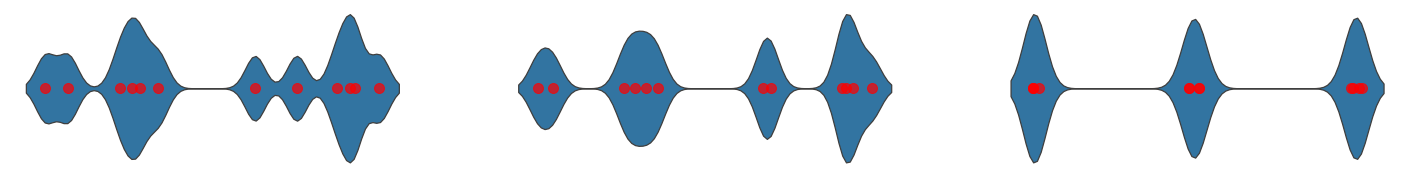

a:  0.15833546050000008
b:  0.1091502987222222
c:  0.024076789791666626


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PyLRO import pylro
#Load a structure and fit the sublattice

###################################
#Put file info here#
file='../../S812/POSCAR.201' 
n=13
###################################


amor=pylro(file,n)
amor.lattice_fit()



#Create 3 subfigures to display each dimension
#Use pylro.x : pylro.y : pylro.z to get the xyz atomic locations of the atoms
fig=plt.figure(figsize=(25,3))

ax1=fig.add_subplot(131)
ax1=sns.violinplot(x=amor.x,bw_method=.08,inner=None)
ax1.scatter(amor.x,np.zeros(len(amor.x)),alpha=.7,color='r',s=100)
ax1.axis('off')



ax2=fig.add_subplot(132)
ax2=sns.violinplot(x=amor.y,bw_method=.08,inner=None)
ax2.scatter(amor.y,np.zeros(len(amor.y)),alpha=.7,color='r',s=100)
ax2.axis('off')


ax3=fig.add_subplot(133)
ax3=sns.violinplot(x=amor.z,bw_method=.08,inner=None)
ax3.scatter(amor.z,np.zeros(len(amor.z)),alpha=.7,color='r',s=100)
ax3.axis('off')

plt.show()

print('a: ',amor.plane_order([1,0,0]))
print('b: ',amor.plane_order([0,1,0]))
print('c: ',amor.plane_order([0,0,1]))
